# Code to separate json and images

In [1]:
import os
import shutil

# Define the paths using raw strings
source_folder = r"/Users/samwall/Documents/5A/Project_Mcador/Active_learning - Copie/subset_6"
images_folder = "Image_Subset_6_DEEPLEARNING"
json_folder = "json_Subset_6_DEEPLEARNING"

# Create directories if they don't exist
os.makedirs(images_folder, exist_ok=True)
os.makedirs(json_folder, exist_ok=True)

# Iterate through the files in the source folder
for file in os.listdir(source_folder):
    if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions as needed
        shutil.move(os.path.join(source_folder, file), os.path.join(images_folder, file))
    elif file.endswith('.json'):
        shutil.move(os.path.join(source_folder, file), os.path.join(json_folder, file))

print("Files have been separated into images and JSONs.")


Files have been separated into images and JSONs.


# passing the images and json files to yolo5 format

In [6]:
# import os
# import json
# import cv2

# # Define paths
# labelme_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\jsons'
# yolo5label_dir = 'yolo5_labels'
# image_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\images'

# # Create output directory if not exists
# os.makedirs(yolo5label_dir, exist_ok=True)

# # Define classes
# classes = ['label', 'pal']  # Update this list with your actual class names

# # Helper function to convert coordinates
# def convert_bbox(img_size, bbox):
#     dw = 1.0 / img_size[1]
#     dh = 1.0 / img_size[0]
#     x = (bbox[0] + bbox[2]) / 2.0
#     y = (bbox[1] + bbox[3]) / 2.0
#     w = bbox[2] - bbox[0]
#     h = bbox[3] - bbox[1]
#     return (x * dw, y * dh, w * dw, h * dh)

# # Iterate through JSON files
# for json_file in os.listdir(labelme_dir):
#     if json_file.endswith('.json'):
#         with open(os.path.join(labelme_dir, json_file)) as f:
#             data = json.load(f)
#             image_path = os.path.join(image_dir, data['imagePath'])
            
#             # Check if the image exists
#             if not os.path.isfile(image_path):
#                 print(f"Image not found for: {data['imagePath']}, skipping this JSON file.")
#                 continue  # Skip this JSON file if the image is not found
            
#             img = cv2.imread(image_path)
#             if img is None:
#                 print(f"Could not read image: {image_path}, skipping this JSON file.")
#                 continue  # Skip this JSON file if the image cannot be read
            
#             img_height, img_width = img.shape[:2]
            
#             # Prepare to write YOLO file only if there are valid shapes
#             yolo_data = []
#             for shape in data['shapes']:
#                 label = shape['label']
#                 if label not in classes:
#                     continue
#                 class_id = classes.index(label)
#                 points = shape['points']
#                 xmin = min(points[0][0], points[1][0])
#                 ymin = min(points[0][1], points[1][1])
#                 xmax = max(points[0][0], points[1][0])
#                 ymax = max(points[0][1], points[1][1])
#                 bbox = [xmin, ymin, xmax, ymax]
#                 yolo_bbox = convert_bbox((img_height, img_width), bbox)
#                 yolo_data.append(f"{class_id} {' '.join(map(str, yolo_bbox))}\n")
            
#             # Only write to the YOLO file if there is valid data
#             if yolo_data:
#                 yolo_filename = os.path.splitext(json_file)[0] + '.txt'
#                 yolo_filepath = os.path.join(yolo5label_dir, yolo_filename)
#                 with open(yolo_filepath, 'w') as yolo_file:
#                     yolo_file.writelines(yolo_data)

# print("Finished processing JSON files, skipping those without corresponding images.")



# new and improved json to txt

In [8]:
import os
import json
import cv2

# Define paths
labelme_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\jsons'
yolo5label_dir = 'yolo5_labels'
image_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\images'

# Create output directory if not exists
os.makedirs(yolo5label_dir, exist_ok=True)

# Define classes
classes = ['label', 'pal']  # Update this list with your actual class names

# Helper function to convert bounding box coordinates
def convert_bbox(img_size, bbox):
    dw = 1.0 / img_size[1]  # width
    dh = 1.0 / img_size[0]  # height
    x_center = (bbox[0] + bbox[2]) / 2.0
    y_center = (bbox[1] + bbox[3]) / 2.0
    width = bbox[2] - bbox[0]
    height = bbox[3] - bbox[1]
    return (x_center * dw, y_center * dh, width * dw, height * dh)

# Function to calculate bounding box from polygon points
def get_bounding_box_from_polygon(points):
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    xmin = min(x_coords)
    ymin = min(y_coords)
    xmax = max(x_coords)
    ymax = max(y_coords)
    return [xmin, ymin, xmax, ymax]

# Iterate through JSON files
for json_file in os.listdir(labelme_dir):
    if json_file.endswith('.json'):
        with open(os.path.join(labelme_dir, json_file)) as f:
            data = json.load(f)
            image_path = os.path.join(image_dir, data['imagePath'])
            
            # Check if the image exists
            if not os.path.isfile(image_path):
                print(f"Image not found for: {data['imagePath']}, skipping this JSON file.")
                continue
            
            img = cv2.imread(image_path)
            if img is None:
                print(f"Could not read image: {image_path}, skipping this JSON file.")
                continue
            
            img_height, img_width = img.shape[:2]
            
            # Prepare to write YOLO file only if there are valid shapes
            yolo_data = []
            for shape in data['shapes']:
                label = shape['label']
                if label not in classes:
                    continue
                class_id = classes.index(label)
                
                # Get the bounding box from polygon points
                points = shape['points']
                bbox = get_bounding_box_from_polygon(points)
                
                # Convert the bounding box to YOLO format
                yolo_bbox = convert_bbox((img_height, img_width), bbox)
                yolo_data.append(f"{class_id} {' '.join(map(str, yolo_bbox))}\n")
            
            # Only write to the YOLO file if there is valid data
            if yolo_data:
                yolo_filename = os.path.splitext(json_file)[0] + '.txt'
                yolo_filepath = os.path.join(yolo5label_dir, yolo_filename)
                with open(yolo_filepath, 'w') as yolo_file:
                    yolo_file.writelines(yolo_data)

print("Finished processing JSON files, skipping those without corresponding images.")


Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744332_1716744332_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744339_1716744339_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744347_1716744347_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744354_1716744354_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744362_1716744362_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744370_1716744370_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744377_1716744377_992_10.jpg, skipping this JSON file.
Image not found for: ..\passageDroite\passageDroite_Bloc1_Camera3_1716744385_1716744385_992_10.jpg, skipping this JSON file.


# First code to see how to split

In [7]:
# import shutil
# import random

# # Define paths
# images_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\images'
# labels_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\jsons'
# train_images_dir = 'path/to/train/images'
# val_images_dir = 'path/to/val/images'
# train_labels_dir = 'path/to/train/labels'
# val_labels_dir = 'path/to/val/labels'

# # Create directories if not exists
# for path in [train_images_dir, val_images_dir, train_labels_dir, val_labels_dir]:
#     os.makedirs(path, exist_ok=True)

# # List images and split
# images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
# random.shuffle(images)
# split_index = int(0.8 * len(images))  # 80-20 split

# train_images = images[:split_index]
# val_images = images[split_index:]

# # Move files
# for image in train_images:
#     shutil.copy(os.path.join(images_dir, image), train_images_dir)
#     shutil.copy(os.path.join(labels_dir, image.replace('.jpg', '.txt')), train_labels_dir)

# for image in val_images:
#     shutil.copy(os.path.join(images_dir, image), val_images_dir)
#     shutil.copy(os.path.join(labels_dir, image.replace('.jpg', '.txt')), val_labels_dir)


# Updated code ( for train valid and test + subset of 200 images)

In [11]:
import shutil
import random
import os

# Define paths
images_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\separations_json_images\images'
labels_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\yolo5_labels'

train_images_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images'
val_images_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_val\images'
test_images_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_test\images'

train_labels_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\labels'
val_labels_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_val\labels'
test_labels_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_test\labels'

# Create directories if not exists
for path in [train_images_dir, val_images_dir, test_images_dir, train_labels_dir, val_labels_dir, test_labels_dir]:
    os.makedirs(path, exist_ok=True)

# List images and filter only those with corresponding .txt label files
images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
valid_images = [img for img in images if os.path.isfile(os.path.join(labels_dir, img.replace('.jpg', '.txt').replace('.png', '.txt')))]

# Randomly select a subset of 200 images that have corresponding label files
subset_images = random.sample(valid_images, min(200, len(valid_images)))  # Select up to 200 random images

# Split the subset into 70% train, 15% validation, 15% test
split_index_train = int(0.7 * len(subset_images))  # 70% for training
split_index_val = int(0.85 * len(subset_images))   # 15% for validation, 15% for test

train_images = subset_images[:split_index_train]
val_images = subset_images[split_index_train:split_index_val]
test_images = subset_images[split_index_val:]

# Move files into corresponding directories
def move_files(image_list, dest_images_dir, dest_labels_dir):
    for image in image_list:
        # Move the image file
        shutil.copy(os.path.join(images_dir, image), dest_images_dir)
        
        # Move the corresponding label file (replace image extension with .txt)
        label_file = image.replace('.jpg', '.txt').replace('.png', '.txt')  # Use .txt as the label file extension
        shutil.copy(os.path.join(labels_dir, label_file), dest_labels_dir)

# Move train, val, and test files
move_files(train_images, train_images_dir, train_labels_dir)
move_files(val_images, val_images_dir, val_labels_dir)
move_files(test_images, test_images_dir, test_labels_dir)

print(f"Successfully split the dataset into train ({len(train_images)}), val ({len(val_images)}), and test ({len(test_images)}).")


Successfully split the dataset into train (140), val (30), and test (30).


# YAML FILE ( data.yaml)

In [ ]:
# train: C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images
# val: C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_val\images
# test: C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_test\images

# # Number of classes
# nc: 2  # Adjust this based on your actual number of classes

# # Names of your classes
# names: ['label', 'pal']  # These are the class names that match the ones in your Labelme data


In [ ]:
# python train.py --img 640 --batch 16 --epochs 50 --data C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\training_subset1.yaml --weights yolov5s.pt --project "model1_yolo5_" --name "experiment_1"

# --img: Image size.
# --batch: Batch size.
# --epochs: Number of epochs.
# --data: Path to your data YAML file.
# --weights: Pretrained weights (e.g., yolov5s.pt for YOLOv5 small).
# --project: Name of your training project.


# 2nd training

In [ ]:
# python train.py --img 640 --batch-size 16 --epochs 100 --data "C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\training_subset1.yaml" --weights yolov5s.pt --project "model1_yolo5_" --name "experiment_2" --hyp data\hyps\hyp.scratch-med.yaml  --exist-ok --device cpu --save-period 10 

# 3rd training corriger les erreurs d'avant ( problme de bounding box)

In [ ]:
#python train.py --img 640 --batch-size 16 --epochs 50 --data "C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\training_subset1.yaml" --weights yolov5s.pt --project "model2_yolo5_" --name "experiment_1"  --exist-ok --device cpu --save-period 5



# Code to visualise entropy of each image

In [4]:
import cv2
import numpy as np
from skimage.measure import shannon_entropy

def calculate_entropy(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Could not read image: {image_path}")
        return None
    hist, _ = np.histogram(img.flatten(), bins=256, density=True)
    hist = hist[hist > 0]  # Remove zero entries
    entropy = -np.sum(hist * np.log2(hist))
    return entropy

# Example usage
image_paths = [r"C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images\passageCentre_Bloc1_Camera3_1716735710_1716735710_992_10.jpg", r"C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images\passageCentre_Bloc1_Camera3_1716735830_1716735830_992_10.jpg"]  # Update with your image paths
for path in image_paths:
    entropy = calculate_entropy(path)
    if entropy is not None:
        print(f"Entropy of {path}: {entropy}")


Entropy of C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images\passageCentre_Bloc1_Camera3_1716735710_1716735710_992_10.jpg: 5.8807121776538445
Entropy of C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images\passageCentre_Bloc1_Camera3_1716735830_1716735830_992_10.jpg: 6.98010299552858


# entropy calcul updated

High entropy: passageGauche_Bloc1_Camera3_1716719760_1716719760_2000_10.jpg with entropy 7.62


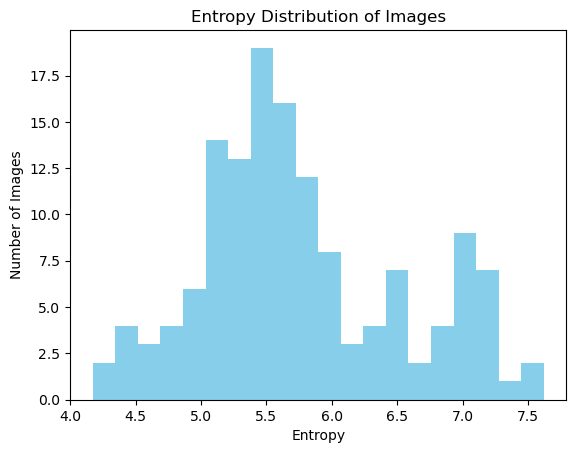

In [13]:
import os
import cv2
import numpy as np
from skimage import io
from scipy.stats import entropy
from matplotlib import pyplot as plt

def calculate_image_entropy(image_path):
    # Load the image in grayscale
    img = io.imread(image_path, as_gray=True)

    # Flatten the image to one dimension
    img = img.ravel()

    # Calculate the histogram
    histogram, _ = np.histogram(img, bins=256, range=(0, 1), density=True)

    # Calculate entropy (scipy entropy of histogram)
    ent = entropy(histogram, base=2)
    
    return ent

def analyze_image_entropies(image_dir, low_threshold=4.0, high_threshold=7.5):
    entropies = {}
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)

        if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            ent = calculate_image_entropy(img_path)
            entropies[img_name] = ent

            if ent < low_threshold:
                print(f"Low entropy: {img_name} with entropy {ent:.2f}")
            elif ent > high_threshold:
                print(f"High entropy: {img_name} with entropy {ent:.2f}")
    
    return entropies

def plot_entropy_distribution(entropies):
    # Plot histogram of entropies
    plt.hist(entropies.values(), bins=20, color='skyblue')
    plt.title("Entropy Distribution of Images")
    plt.xlabel("Entropy")
    plt.ylabel("Number of Images")
    plt.show()

# Example usage:
image_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images'  # Path to your image folder
entropies = analyze_image_entropies(image_dir)

# Plot entropy distribution
plot_entropy_distribution(entropies)


# creation of extreme entropy images for inspection

In [2]:
import os
import cv2
import numpy as np
from skimage import io
from scipy.stats import entropy
import matplotlib.pyplot as plt
from PIL import Image

# Function to calculate entropy
def calculate_entropy(img):
    hist, _ = np.histogram(img.ravel(), bins=256, range=(0, 256))
    hist = hist / hist.sum()  # Normalize histogram
    return entropy(hist, base=2)

# Define paths
image_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images'
low_entropy_dir = 'low_entropy_images'
high_entropy_dir = 'high_entropy_images'

# Create directories if they don't exist
os.makedirs(low_entropy_dir, exist_ok=True)
os.makedirs(high_entropy_dir, exist_ok=True)

# Set entropy thresholds
low_entropy_threshold = 4.5
high_entropy_threshold = 6.5

# Process images
for image_name in os.listdir(image_dir):
    if image_name.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(image_dir, image_name)
        image = io.imread(image_path, as_gray=True)
        
        ent = calculate_entropy(image)
        
        # Save low-entropy and high-entropy images
        if ent < low_entropy_threshold:
            cv2.imwrite(os.path.join(low_entropy_dir, image_name), image)
        elif ent > high_entropy_threshold:
            cv2.imwrite(os.path.join(high_entropy_dir, image_name), image)


# Check if bounding boxes are good

In [12]:
import os
import cv2

# Paths to your images and labels
image_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\images'  # Folder with images
label_dir = r'C:\Users\walls\OneDrive\Documents\5A\Projet_AInspector\test_yolo_5\subset_train\labels'  # Folder with .txt label files
output_dir = 'output_images_with_boxes'  # Folder to save images with boxes for verification

# Make sure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define class names corresponding to class indices
classes = ['label', 'pal']  # Add or adjust class names if needed

# Function to load labels from .txt file
def load_labels(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    labels = []
    for line in lines:
        # YOLO format: <class> <x_center> <y_center> <width> <height>
        cls, x_center, y_center, width, height = map(float, line.strip().split())
        labels.append([cls, x_center, y_center, width, height])
    return labels

# Function to draw bounding boxes on the image with class names
def draw_bounding_boxes(image, labels, img_width, img_height):
    for label in labels:
        cls, x_center, y_center, width, height = label
        
        # Convert YOLO format (relative to image size) to (x_min, y_min, x_max, y_max) in pixel values
        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)

        # Draw the rectangle on the image (blue box with thickness of 2)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        
        # Get the class name from the class ID
        class_name = classes[int(cls)]

        # Display the class name on the image near the bounding box
        cv2.putText(image, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    return image

# Loop through the images and corresponding labels
for image_name in os.listdir(image_dir):
    if image_name.endswith(('.jpg', '.png', '.jpeg')):  # Check for image files
        image_path = os.path.join(image_dir, image_name)
        label_name = image_name.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
        label_path = os.path.join(label_dir, label_name)
        
        if os.path.exists(label_path):
            # Load the image
            image = cv2.imread(image_path)
            img_height, img_width = image.shape[:2]

            # Load the bounding boxes from the corresponding .txt file
            labels = load_labels(label_path)

            # Draw the bounding boxes on the image
            image_with_boxes = draw_bounding_boxes(image, labels, img_width, img_height)

            # Save the image with bounding boxes for visual inspection
            output_image_path = os.path.join(output_dir, image_name)
            cv2.imwrite(output_image_path, image_with_boxes)

print("Bounding box visualization completed. Check the output folder for images with bounding boxes and class names.")


Bounding box visualization completed. Check the output folder for images with bounding boxes and class names.
